In [6]:
import torch.nn as nn
from torch.autograd import Variable as V
import torch
from torch.utils.data import DataLoader,Dataset,TensorDataset
from sklearn.datasets import load_iris
from  sklearn.preprocessing import MinMaxScaler
import numpy
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

import torch.nn.functional as F

In [7]:
iris = load_iris()
x=iris.data
y=iris.target
Y=y 
 

MMScaler=MinMaxScaler()
x=MMScaler.fit_transform(x)
iforestX=x
 

tensor_x=torch.from_numpy(x.astype(numpy.float32))
tensor_y=torch.from_numpy(y.astype(numpy.float32))
my_dataset=TensorDataset(tensor_x,tensor_y)
my_dataset_loader=DataLoader(my_dataset,batch_size=10,shuffle=False)
#print(isinstance(my_dataset,Dataset))

In [18]:
import math
class Pgelu(nn.Module): 
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.randn(1)) 

    def forward(self, input):
        temp2=input/2*(1+torch.erf(input/math.sqrt(2)/self.sigma))
        return temp2

class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(4, 10),
            Pgelu(),  # Change here
            nn.Linear(10, 2),
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 10),
            Pgelu(),  # Change here
            nn.Linear(10, 4),
            nn.Sigmoid()
        )
 
    def forward(self, x):
        encoder = self.encoder(x)
        decoder = self.decoder(encoder)
        return encoder, decoder

In [19]:
model = autoencoder()
 

criterion=nn.MSELoss()
 

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  
 
for epoch in range(200):
    total_loss = 0
    for i, (x, y) in enumerate(my_dataset_loader):
        _, pred = model(x)  
        loss = criterion(pred, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()  
    if epoch % 100 == 0:
        print(total_loss)

1.2205936312675476
0.05415552365593612


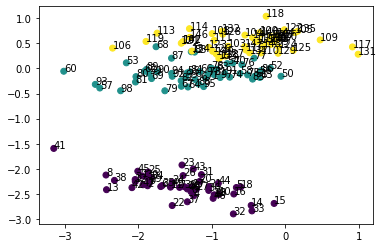

In [5]:

x_=[]
y_=[]
for i, (x, y) in enumerate(my_dataset):
    _, pred = model(V(x))
    #loss = criterion(pred, x)
    dimension=_.data.numpy()
    x_.append(dimension[0])
    y_.append(dimension[1])

plt.scatter(numpy.array(x_),numpy.array(y_),c=Y)
 
for i in range(len(numpy.array(x_))):
    plt.annotate(i,(x_[i],y_[i]))
plt.show()
 

In [43]:
print(model.encoder)
print(model.decoder)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): Pgelu()
  (2): Linear(in_features=3, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): Pgelu()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): Sigmoid()
)


In [35]:
model = autoencoder()
 

criterion=nn.MSELoss()
 

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  
 

for epoch in range(200):
    total_loss = 0
    for i, (x, y) in enumerate(my_dataset_loader):
        _, pred = model(x)  
        loss = criterion(pred, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()  
    if epoch % 100 == 0:
        print(total_loss)

1.3189060166478157
0.05039017176022753


In [36]:
model

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): Pgelu()
    (2): Linear(in_features=10, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Pgelu()
    (2): Linear(in_features=10, out_features=4, bias=True)
    (3): Sigmoid()
  )
)

In [37]:
model.encoder[1].sigma

Parameter containing:
tensor([0.8784], requires_grad=True)

In [38]:
model.decoder[1].sigma

Parameter containing:
tensor([1.3699], requires_grad=True)

In [39]:
# torch.save(model.state_dict(), 'AEsave1.pth')

In [40]:
model = autoencoder()  
model.load_state_dict(torch.load('AEsave1.pth'))
model.eval()  

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): Pgelu()
    (2): Linear(in_features=10, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Pgelu()
    (2): Linear(in_features=10, out_features=4, bias=True)
    (3): Sigmoid()
  )
)

In [80]:

start_ii, end_ii, step_ii = 0.05, 2, 0.05
start_jj, end_jj, step_jj = 0.05, 2.4, 0.05

lineA = torch.arange(start_ii, end_ii + step_ii, step_ii)
lineB = torch.arange(start_jj, end_jj + step_jj, step_jj)


result_matrix = torch.zeros((len(lineA), len(lineB)))



for i, ii in enumerate(lineA):
    for j, jj in enumerate(lineB):
        
        model = autoencoder()  
        model.load_state_dict(torch.load('AEsave1.pth'))
        model.eval()
        
        model.encoder[1].sigma.data = ii
        model.decoder[1].sigma.data = jj
        
        total_loss = 0
        
        for iii, (x, y) in enumerate(my_dataset_loader):
            _, pred = model(x)  
            loss = criterion(pred, x)
        
            total_loss += loss.item()  
        
        
        
        
        result = total_loss
        
        result_matrix[i, j] = result
    #    print(i,j,ii,jj,result)

                       

In [81]:
model = autoencoder()  
model.load_state_dict(torch.load('AEsave1.pth'))
model.eval()

        
total_loss = 0
        
for iii, (x, y) in enumerate(my_dataset_loader):
    _, pred = model(x)  
    loss = criterion(pred, x)
        
    total_loss += loss.item()  
    
result_opt = total_loss
print(result_opt)

0.04486880078911781


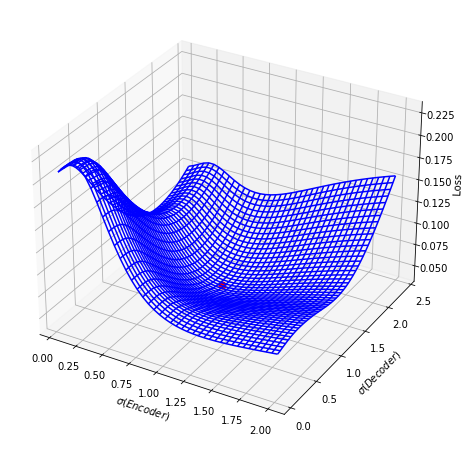

In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y = torch.meshgrid(lineA, lineB)

surf = ax.plot_wireframe(X, Y, result_matrix.numpy(),color='blue')


ax.scatter([0.8784], [1.3699], result_opt, color='red', marker='o',s=50)

#ax.legend(fontsize='large')


ax.set_xlabel('$\sigma(Encoder)$')
ax.set_ylabel('$\sigma(Decoder)$')
ax.set_zlabel('  Loss')


#ax.set_title('Surface Plot')


#fig.colorbar(surf)


plt.show()

In [96]:
import numpy as np


result_array = result_matrix.numpy()


np.savetxt('result_matrix.csv', result_array, delimiter=',')